# Peer-graded Assignment: Testing a Potential Moderator


The final assignment deals with testing a potential moderator. When testing a potential moderator, we are asking the question whether there is an association between two constructs for different subgroups within the sample.

**Instructions**

Run an ANOVA, Chi-Square Test or correlation coefficient that includes a moderator.

## WHAT TO SUBMIT:

Following completion of the steps described above, create a blog entry where you submit syntax used to test moderation (copied and pasted from your program) along with corresponding output and a few sentences of interpretation. 

**Review Criteria**

Your assessment will be based on the evidence you provide that you have completed all of the steps. In all cases, consider that the peer assessing your work is likely not an expert in the field you are analyzing. 

# Data Info (Code Book):

PPAGE: Age

* 18 to 67: numeric

PPGENDER: Gender

* 1: Male
* 2: Female
* -2: Not asked
* -1: Refused

PPEDUCAT: Education (Categorical)

* 1    Less than high school    219    9.5%
* 2    High school    700    30.5%
* 3    Some college    682    29.7%
* 4    Bachelor's degree or higher    693    30.2%
* -2    Not asked    0    0.0%
* -1    REFUSED    0    0.0%


PPETHM: Race / Ethnicity

* 1    White, Non-Hispanic    814    35.5%
* 2    Black, Non-Hispanic    1278    55.7%
* 3    Other, Non-Hispanic    46    2.0%
* 4    Hispanic    123    5.4%
* 5    2+ Races, Non-Hispanic    33    1.4%      
* -2    Not asked    0    0.0%
* -1    REFUSED    0    0.0%

W1_N1A How would you rate people on welfare?

* 0 to 100: numeric
* -1    Refused
* 998    Don't Recognize

W1_N1D: How would you rate Whites?

* 0 to 100: numeric
* -1    Refused
* 998    Don't Recognize

W1_N1G: How would you rate gays/lesbians?

* 0 to 100: numeric
* -1    Refused
* 998    Don't Recognize

W1_N1I: How would you rate Congress?

* 0 to 100: numeric
* -1    Refused
* 998    Don't Recognize

W1_N1J: How would you rate the wealthiest 1%?

* 0 to 100: numeric
* -1    Refused
* 998    Don't Recognize

W1_N1K: How would you rate the unemployed?

* 0 to 100: numeric
* -1    Refused
* 998    Don't Recognize

W1_N1L: How would you rate unmarried mothers?

* 0 to 100: numeric
* -1    Refused
* 998    Don't Recognize

W1_N1M: How would you rate undocumented immigrants?

* 0 to 100: numeric
* -1    Refused
* 998    Don't Recognize

W1_N1N: How would you rate public school teachers?

* 0 to 100: numeric
* -1    Refused
* 998    Don't Recognize


# Research: Attitude to selected groups


## Attitude (how one rates) the interested groups:

* 'welfare': people on welfare payment
* 'gays': gays and lesbians
* 'immigrants': undocumented immigrants
* 'white': white people (maybe can be used as a reference point)
* 'mothers': unmarried mothers
* 'immigrants': undocumented immigrants
* 'teachers': public school teachers

## Methods

* ANOVA (X: categorical Y: quantative)
 - how males and females rate unmarried mothers
 - test if age group is a moderator 

* Chi-Square Test (X: categorical Y: categorical)
 - Chi squared Test on how one rates unmarried mother when we know how the same person rates people on welfare
 - Then we test if race is a moderator
 
* Corelation coefficient
 - Find correlation coefficient and p-value on how one rates unemployed people
 - Then test if sex is a moderator
 - Test again if the education level is a moderator

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from scipy.stats import t
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr
from scipy.stats import probplot
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats import multicomp

%matplotlib inline

from itertools import combinations
from pprint import pprint

/Users/apple/anaconda3/envs/deep/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
data_from = pd.read_csv('../../datasets/ool_pds.csv', low_memory=False)

In [3]:
data = data_from[['PPAGE', 'PPGENDER', 'PPEDUCAT', 'PPETHM', 'W1_N1A', 'W1_N1D', 'W1_N1G', 'W1_N1I', 'W1_N1J', 
                  'W1_N1K', 'W1_N1L', 'W1_N1M', 'W1_N1N']].copy()
data.columns = ['age', 'sex', 'edu', 'race', 'welfare', 'white', 'gays', 'congress', 'rich1', 'unemployed',
               'mothers', 'immigrants', 'teachers']


In [4]:
# Here we will look at these variables: 'welfare', 'gays', 'immigrants', 'white', 'teachers'
# data = data.drop(['congress', 'rich1', 'unemployed', 'mother'], axis=1)
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,2294.0,48.899303,16.457583,18.0,36.0,51.0,62.0,81.0
sex,2294.0,1.550131,0.497589,1.0,1.0,2.0,2.0,2.0
edu,2294.0,2.806016,0.975647,1.0,2.0,3.0,4.0,4.0
race,2294.0,1.815606,0.827725,1.0,1.0,2.0,2.0,5.0
welfare,2294.0,83.614211,177.877455,-1.0,40.0,50.0,70.0,998.0
white,2294.0,95.629468,165.648334,-1.0,50.0,70.0,85.0,998.0
gays,2294.0,95.956844,203.805058,-1.0,40.0,50.0,80.0,998.0
congress,2294.0,75.812990,195.378451,-1.0,15.0,40.0,50.0,998.0
rich1,2294.0,102.053618,240.327383,-1.0,15.0,50.0,60.0,998.0
unemployed,2294.0,95.384917,187.429109,-1.0,50.0,60.0,80.0,998.0


In [5]:
# change cell values -1 Refused and 998 Don't Recognize to NaN
data = data.applymap(lambda x: np.NaN if x == -1.0 or x == -2.0 or x == 998.0 else x)
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,2294.0,48.899303,16.457583,18.0,36.0,51.0,62.0,81.0
sex,2294.0,1.550131,0.497589,1.0,1.0,2.0,2.0,2.0
edu,2294.0,2.806016,0.975647,1.0,2.0,3.0,4.0,4.0
race,2294.0,1.815606,0.827725,1.0,1.0,2.0,2.0,5.0
welfare,2128.0,51.719455,23.997860,0.0,40.0,50.0,70.0,100.0
white,2113.0,69.393280,21.908234,0.0,50.0,70.0,85.0,100.0
gays,2079.0,53.607023,29.649119,0.0,40.0,50.0,75.0,100.0
congress,2101.0,36.746787,24.549147,0.0,15.0,40.0,50.0,100.0
rich1,2033.0,40.592228,27.943815,0.0,15.0,50.0,50.0,100.0
unemployed,2092.0,60.281071,23.889879,0.0,50.0,60.0,75.0,100.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2294 entries, 0 to 2293
Data columns (total 13 columns):
age           2294 non-null int64
sex           2294 non-null int64
edu           2294 non-null int64
race          2294 non-null int64
welfare       2128 non-null float64
white         2113 non-null float64
gays          2079 non-null float64
congress      2101 non-null float64
rich1         2033 non-null float64
unemployed    2092 non-null float64
mothers       2115 non-null float64
immigrants    2060 non-null float64
teachers      2144 non-null float64
dtypes: float64(9), int64(4)
memory usage: 233.1 KB


In [7]:
data = data.dropna()

In [8]:
data.edu = data.edu.astype('category')
data.race = data.race.astype('category')

def classify_age(age):
    if age < 30:
        return 1
    elif age < 50:
        return 2
    elif age < 70:
        return 3
    else:
        return 4

data['age_cat'] = data['age'].apply(classify_age)
data.age_cat = data.age_cat.astype('category')

In [9]:
data['age_cat2'] = pd.qcut(data['age'], 4, labels=['young', 'middle', 'mature', 'senior'])

In [10]:
data.head().T

,0,1,2,3,5
age,56,59,36,70,18
sex,2,1,1,1,1
edu,2,1,4,4,1
race,4,2,2,2,1
welfare,50,80,70,50,0
white,50,50,78,50,85
gays,0,0,55,100,50
congress,60,10,55,40,0
rich1,50,15,15,1,50
unemployed,50,70,80,50,50


In [11]:
data.sex.value_counts()

2    984
1    869
Name: sex, dtype: int64

In [12]:
data.edu.value_counts()

4    616
3    561
2    532
1    144
Name: edu, dtype: int64

In [13]:
data.race.value_counts()

2    994
1    712
4     90
3     32
5     25
Name: race, dtype: int64

In [14]:
data.age_cat.value_counts()

3    826
2    553
1    284
4    190
Name: age_cat, dtype: int64

# ANOVA

* Exploring which variables are significantly associated with 'sex'
* Exploring which variables are significantly associated with 'edu' (education)
* Exploring which variables are significantly associated with 'age'

In [15]:
# exploring which variables are significantly associated with 'sex'
y_vars = ['welfare', 'white', 'gays', 'immigrants', 'mothers', 'teachers']
x_var = 'sex'

for y_var in y_vars:
    formula = f'{y_var} ~ C({x_var})'
    model = ols(formula=formula, data=data).fit()
    flag = '**' if model.f_pvalue < .005 else ''
    print(f'X: {x_var} Y: {y_var:<12}, F-statistic: {model.fvalue:.4f},\tProb (F-statistic): {model.f_pvalue:.4f}{flag}')

X: sex Y: welfare     , F-statistic: 14.4023,	Prob (F-statistic): 0.0002**
X: sex Y: white       , F-statistic: 0.0543,	Prob (F-statistic): 0.8158
X: sex Y: gays        , F-statistic: 27.0980,	Prob (F-statistic): 0.0000**
X: sex Y: immigrants  , F-statistic: 5.5794,	Prob (F-statistic): 0.0183
X: sex Y: mothers     , F-statistic: 15.1112,	Prob (F-statistic): 0.0001**
X: sex Y: teachers    , F-statistic: 3.2156,	Prob (F-statistic): 0.0731


In [16]:
# exploring which variables are significantly associated with 'sex'
y_vars = ['welfare', 'white', 'gays', 'immigrants', 'mothers', 'teachers']
x_var = 'edu'

for y_var in y_vars:
    formula = f'{y_var} ~ C({x_var})'
    model = ols(formula=formula, data=data).fit()
    flag = '**' if model.f_pvalue < .005 else ''
    print(f'X: {x_var} Y: {y_var:<12}, F-statistic: {model.fvalue:.4f},\tProb (F-statistic): {model.f_pvalue:.4f}{flag}')

X: edu Y: welfare     , F-statistic: 5.2875,	Prob (F-statistic): 0.0012**
X: edu Y: white       , F-statistic: 1.5387,	Prob (F-statistic): 0.2025
X: edu Y: gays        , F-statistic: 6.3837,	Prob (F-statistic): 0.0003**
X: edu Y: immigrants  , F-statistic: 8.7417,	Prob (F-statistic): 0.0000**
X: edu Y: mothers     , F-statistic: 3.7669,	Prob (F-statistic): 0.0104
X: edu Y: teachers    , F-statistic: 9.8705,	Prob (F-statistic): 0.0000**


In [17]:
# exploring which variables are significantly associated with 'sex'
y_vars = ['welfare', 'white', 'gays', 'immigrants', 'mothers', 'teachers']
x_var = 'age_cat2'

for y_var in y_vars:
    formula = f'{y_var} ~ C({x_var})'
    model = ols(formula=formula, data=data).fit()
    flag = '**' if model.f_pvalue < .005 else ''
    print(f'X: {x_var} Y: {y_var:<12}, F-statistic: {model.fvalue:.4f},\tProb (F-statistic): {model.f_pvalue:.4f}{flag}')

X: age_cat2 Y: welfare     , F-statistic: 4.8744,	Prob (F-statistic): 0.0022**
X: age_cat2 Y: white       , F-statistic: 7.7239,	Prob (F-statistic): 0.0000**
X: age_cat2 Y: gays        , F-statistic: 1.4384,	Prob (F-statistic): 0.2297
X: age_cat2 Y: immigrants  , F-statistic: 0.5995,	Prob (F-statistic): 0.6154
X: age_cat2 Y: mothers     , F-statistic: 4.6416,	Prob (F-statistic): 0.0031**
X: age_cat2 Y: teachers    , F-statistic: 6.9838,	Prob (F-statistic): 0.0001**


# Testing moderation in the context of ANOVA

First, we want to know how one rate unmarried mothers given one's gender by ANOVA. The result is significant and the X (sex) only has two level so no need for the post hoc test.

Then, we divide age into four groups (young, middle, mature and senior). The middle and young groups retain a significant p-value and mature groups are not far off. If we look at the chart ('Gender and Age Group' with 'Rating unmarried mothers'), the gap between gender does shrink a bit in the senior group.

There is a significant but weak statistical interaction between sex and how one rate unmarried mothers but the age group doesn't not moderate the relationship.


In [18]:
# Set Target Response Variable
# explored variables and most siginificant factor: 
#   mothers - sex (yes), age (young, senior)
#   gays - sex (yes), age (no)
#   immigrants - sex (yes), age (no)
#   teachers - sex(no), age (yes)
resp = 'mothers'

       mothers
sex           
1    60.565017
2    64.793699
       mothers
sex           
1    23.393833
2    23.345499


Text(10.05,0.5,'Rating unmarried mothers')

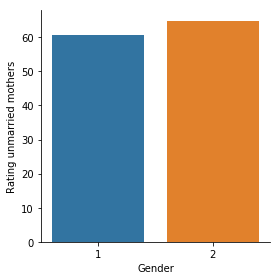

In [19]:
data1 = data[['sex', resp]]
print(data1.groupby('sex').mean())
print(data1.groupby('sex').std())

sns.factorplot(x='sex', y='mothers', data=data1, kind="bar", ci=None)
plt.xlabel('Gender')
plt.ylabel('Rating unmarried mothers')

            mothers
age_cat2           
young     62.932914
middle    64.106472
mature    64.758542
senior    59.460699
            mothers
age_cat2           
young     25.439575
middle    23.279346
mature    22.775678
senior    21.796442


Text(10.05,0.5,'Rating unmarried mothers')

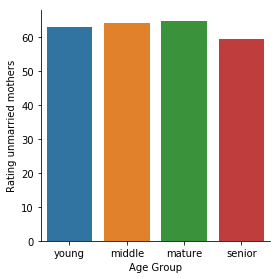

In [20]:
data1 = data[['age_cat2', resp]]
print(data1.groupby('age_cat2').mean())
print(data1.groupby('age_cat2').std())

sns.factorplot(x='age_cat2', y='mothers', data=data1, kind="bar", ci=None)
plt.xlabel('Age Group')
plt.ylabel('Rating unmarried mothers')

                mothers
age_cat2 sex           
young    1    60.101852
         2    65.275862
middle   1    61.437768
         2    66.634146
mature   1    62.808824
         2    66.451064
senior   1    57.967593
         2    60.793388
                mothers
age_cat2 sex           
young    1    24.982018
         2    25.623617
middle   1    23.461758
         2    22.866522
mature   1    22.621924
         2    22.821323
senior   1    22.261738
         2    21.330405


Text(27.3365,0.5,'Rating unmarried mothers')

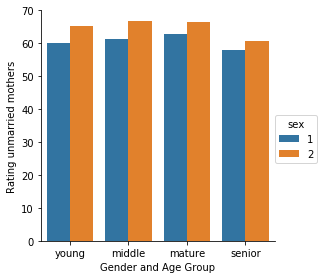

In [21]:
data1 = data[['age_cat2', 'sex', resp]]
print(data1.groupby(['age_cat2', 'sex']).mean())
print(data1.groupby(['age_cat2', 'sex']).std())

sns.factorplot(x='age_cat2', y='mothers', hue='sex', data=data1, kind="bar", ci=None)
plt.xlabel('Gender and Age Group')
plt.ylabel('Rating unmarried mothers')

In [22]:
model1a = ols(formula=f'{resp} ~ sex', data=data).fit()
model1a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                mothers   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     15.11
Date:                Mon, 26 Mar 2018   Prob (F-statistic):           0.000105
Time:                        12:03:00   Log-Likelihood:                -8467.8
No. Observations:                1853   AIC:                         1.694e+04
Df Residuals:                    1851   BIC:                         1.695e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     56.3363      1.752     32.161      0.000      52.901      59.772
sex            4.2287      1.088      3.887      0.000       2.095       6.362
==============================================================================
Omnibus:                       20.853   Durbin-Watson:                   1.927
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.416
Skew:                          -0.231   Prob(JB):                     3.69e-05
Kurtosis:                       2.776   Cond. No.                         7.06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [269]:
data1_young = data[data['age_cat2'] == 'young']
data1_middle = data[data['age_cat2'] == 'middle']
data1_mature = data[data['age_cat2'] == 'mature']
data1_senior = data[data['age_cat2'] == 'senior']
y_var = resp
x_var = 'sex'
formula = f'{y_var} ~ C({x_var})'

model = ols(formula=formula, data=data1_young).fit()
flag = '**' if model.f_pvalue < .005 else ''
print(f'Young Group - X: {x_var}, Y: {y_var}, F-statistic: {model.fvalue:.4f},\tProb (F-statistic): {model.f_pvalue:.4f}{flag}')

model = ols(formula=formula, data=data1_middle).fit()
flag = '**' if model.f_pvalue < .005 else ''
print(f'Middle Group - X: {x_var}, Y: {y_var}, F-statistic: {model.fvalue:.4f},\tProb (F-statistic): {model.f_pvalue:.4f}{flag}')

model = ols(formula=formula, data=data1_mature).fit()
flag = '**' if model.f_pvalue < .005 else ''
print(f'Mature Group - X: {x_var}, Y: {y_var}, F-statistic: {model.fvalue:.4f},\tProb (F-statistic): {model.f_pvalue:.4f}{flag}')

model = ols(formula=formula, data=data1_senior).fit()
flag = '**' if model.f_pvalue < .005 else ''
print(f'Senior Group - X: {x_var}, Y: {y_var}, F-statistic: {model.fvalue:.4f},\tProb (F-statistic): {model.f_pvalue:.4f}{flag}')

Young Group - X: sex, Y: mothers, F-statistic: 4.9293,	Prob (F-statistic): 0.0269
Middle Group - X: sex, Y: mothers, F-statistic: 6.0250,	Prob (F-statistic): 0.0145
Mature Group - X: sex, Y: mothers, F-statistic: 2.8042,	Prob (F-statistic): 0.0947
Senior Group - X: sex, Y: mothers, F-statistic: 1.9222,	Prob (F-statistic): 0.1663


# Chi-Squared Test



In [50]:
data.columns

Index(['age', 'sex', 'edu', 'race', 'welfare', 'white', 'gays', 'congress',
       'rich1', 'unemployed', 'mothers', 'immigrants', 'teachers', 'age_cat',
       'age_cat2'],
      dtype='object')

In [101]:
chivars = ['race', 'welfare', 'white', 'gays', 'congress',
       'unemployed', 'mothers', 'immigrants', 'teachers']
data2 = data[chivars].copy()

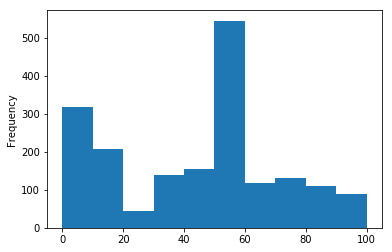

In [102]:
# can't qcut rich1 into 4
data['rich1'].plot(kind='hist', bins=10)

In [103]:
for chivar in chivars[1:]:
    data2[chivar+'_cat'] = pd.qcut(data2[chivar], 4, labels=['low', 'med-low', 'med-high', 'high'], duplicates='drop')
    data2[chivar+'_cat2'] = pd.qcut(data2[chivar], 4, labels=[1, 2, 3, 4], duplicates='drop')
    data2[chivar+'_cat2'] = data2[chivar+'_cat2'].astype('int')


## Chi squared Test on how one rates unmarried mother among four groups (how the same person rates people on welfare)

* Chi squared test's p value is 1.5070217022941629e-85 so it's significant (how the same person rates people on welfare)
* Bonferroni correction = p/c = 0.05 / 6 = 0.0083
 - 4 levels = 6 combinations (c = 6)
* Post Hoc Test shows all comparisons (6) are sigificant.

In [110]:
ct = pd.crosstab(data2['welfare_cat'], data2['mothers_cat'])
print(ct)
print()
print(ct / ct.sum(axis=0))  # column percentage
print()
print(chi2_contingency(ct))

mothers_cat  low  med-low  med-high  high
welfare_cat                              
low          391       45       125    41
med-low      293       69       120    56
med-high      58       44       121    28
high          77       29       205   151

mothers_cat       low   med-low  med-high      high
welfare_cat                                        
low          0.477411  0.240642  0.218914  0.148551
med-low      0.357753  0.368984  0.210158  0.202899
med-high     0.070818  0.235294  0.211909  0.101449
high         0.094017  0.155080  0.359019  0.547101

(423.22826912929497, 1.5070217022941629e-85, 9, array([[ 266.07555316,   60.75229358,  185.50566649,   89.66648678],
       [ 237.78845116,   54.29357798,  165.78413384,   80.13383702],
       [ 110.93847814,   25.33027523,   77.34538586,   37.38586077],
       [ 204.19751754,   46.62385321,  142.36481382,   68.81381543]]))


Text(6.675,0.5,'how one rates unmarried mothers')

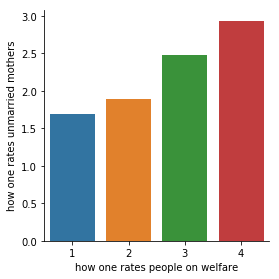

In [106]:
sns.factorplot(x='welfare_cat2', y='mothers_cat2', data=data2, kind='bar', ci=None)
plt.xlabel('how one rates people on welfare')
plt.ylabel('how one rates unmarried mothers')

In [195]:
# Post Hoc Test for Chi Square Tests


levels = ['low', 'med-low', 'med-high', 'high']
bc = 0.05 / 6 # bonferronicorrection
sig_pairs = []

for g1, g2 in combinations([1, 2, 3, 4], 2):
    print(f'<<<Group: {levels[g1-1]} and {levels[g2-1]}>>>')
    dfr = data2[(data2['welfare_cat2'] == g1) | (data2['welfare_cat2'] == g2)]
    ct = pd.crosstab(dfr['welfare_cat2'], dfr['mothers_cat2'])
    print(ct)
    print('-'*70)
    print(ct / ct.sum(axis=0))  # column percentage
    print('-'*70)
    chi2, p, dof, expected = chi2_contingency(ct)
    if p < bc:
        flag = '**'
        sig_pairs.append((f'{levels[g1-1]} vs {levels[g2-1]}'))
    else:
        flag = ''
    
    print(f'Chi2: {chi2}, p: {p:.4f}{flag}, dof: {dof}')
    pprint(expected)
    print('='*70)
    
print(sig_pairs)

<<<Group: low and med-low>>>
mothers_cat2    1   2    3   4
welfare_cat2                  
1             391  45  125  41
2             293  69  120  56
----------------------------------------------------------------------
mothers_cat2         1         2         3        4
welfare_cat2                                       
1             0.571637  0.394737  0.510204  0.42268
2             0.428363  0.605263  0.489796  0.57732
----------------------------------------------------------------------
Chi2: 17.97887797133177, p: 0.0004**, dof: 3
array([[ 361.2       ,   60.2       ,  129.37719298,   51.22280702],
       [ 322.8       ,   53.8       ,  115.62280702,   45.77719298]])
<<<Group: low and med-high>>>
mothers_cat2    1   2    3   4
welfare_cat2                  
1             391  45  125  41
3              58  44  121  28
----------------------------------------------------------------------
mothers_cat2         1         2        3         4
welfare_cat2                        

##  Testing moderation in the context of Chi-Square

Here, I divide the data into five racial sub groups and conduct post hoc tests for each sub group.

It seems that not all 6 pairs in each racial group are significant. Particularly, all are not significant in the 2+ race group, and reduced to 2 in the hispanic group and 1 in the other group but remain significant in the black and white groups.

Although it's not conclusive, it is possible to claim that the race variable has some moderation effect.

In [196]:
# use race to break up to subgroups
# 1 White, Non-Hispanic 814 35.5%
# 2 Black, Non-Hispanic 1278 55.7%
# 3 Other, Non-Hispanic 46 2.0%
# 4 Hispanic 123 5.4%
# 5 2+ Races, Non-Hispanic 33 1.4%
# -2 Not asked 0 0.0%
# -1 REFUSED 0 0.0%
data2r = {}
data2r['white'] = data2[data2.race == 1]
data2r['black'] = data2[data2.race == 2]
data2r['other'] = data2[data2.race == 3]
data2r['hispanic'] = data2[data2.race == 4]
data2r['2+races'] = data2[data2.race == 5]

In [197]:
# Look at the Chi Squared Tests again but we will isolate each race group first
sig_pairs_race = {}
for k, i in data2r.items():
    print(f'Racial Group: {k}')
    print('#'*20)
    data2b = data2r[k]
    levels = ['low', 'med-low', 'med-high', 'high']
    bc = 0.05 / 6 # bonferronicorrection
    
    # sub racial group chi-test
    ct = pd.crosstab(data2b['welfare_cat2'], data2b['mothers_cat2'])
    chi2, p, dof, exptected = chi2_contingency(ct)
    print(f'Chi2: {chi2}, p: {p:.4f}{flag}, dof: {dof}')
    pprint(expected)
    print('#'*70)
    
    if p > .05: continue  # skip post hoc if p is too high

    sig_pairs = []

    for g1, g2 in combinations([1, 2, 3, 4], 2):
        print(f'<<<Post Hoc: {levels[g1-1]} and {levels[g2-1]}>>>')
        dfr = data2b[(data2b['welfare_cat2'] == g1) | (data2b['welfare_cat2'] == g2)]
        ct = pd.crosstab(dfr['welfare_cat2'], dfr['mothers_cat2'])
        print(ct)
        print('-'*70)
        print(ct / ct.sum(axis=0))  # column percentage
        print('-'*70)
        chi2, p, dof, expected = chi2_contingency(ct)
        if p < bc:
            flag = '**'
            sig_pairs.append((f'{levels[g1-1]} vs {levels[g2-1]}'))
        else:
            flag = ''

        print(f'Chi2: {chi2}, p: {p:.4f}{flag}, dof: {dof}')
        pprint(expected)
        print('='*70)

    print(f'For racial gorup "{k}", these pairs are significant: {sig_pairs}')
    sig_pairs_race[k] = sig_pairs
    print()

Racial Group: white
####################
Chi2: 138.0421673937368, p: 0.0000**, dof: 9
array([[  47.52454418,   25.69845722,  114.76297335,   63.01402525],
       [  87.47545582,   47.30154278,  211.23702665,  115.98597475]])
######################################################################
<<<Post Hoc: low and med-low>>>
mothers_cat2    1   2   3  4
welfare_cat2                
1             254  32  68  7
2             112  31  30  6
----------------------------------------------------------------------
mothers_cat2         1         2         3         4
welfare_cat2                                        
1             0.693989  0.507937  0.693878  0.538462
2             0.306011  0.492063  0.306122  0.461538
----------------------------------------------------------------------
Chi2: 9.679136940928297, p: 0.0215, dof: 3
array([[ 244.67777778,   42.11666667,   65.51481481,    8.69074074],
       [ 121.32222222,   20.88333333,   32.48518519,    4.30925926]])
<<<Post Hoc: low and

In [198]:
pprint(sig_pairs_race)

{'black': ['low vs med-high',
           'low vs high',
           'med-low vs med-high',
           'med-low vs high',
           'med-high vs high'],
 'hispanic': ['low vs high', 'med-low vs high'],
 'other': ['med-low vs high'],
 'white': ['low vs med-high',
           'low vs high',
           'med-low vs med-high',
           'med-low vs high',
           'med-high vs high']}


Text(0.5,1,'white group')

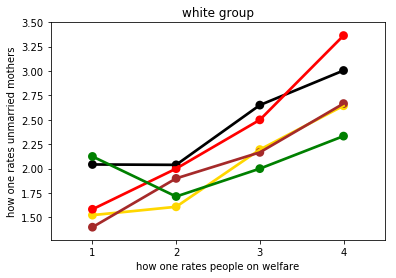

In [189]:
# sns.pointplot(x='welfare_cat2', y='mothers_cat2', data=data2, color='b', ci=None)
sns.pointplot(x='welfare_cat2', y='mothers_cat2', data=data2r['white'], color='gold', ci=None)
sns.pointplot(x='welfare_cat2', y='mothers_cat2', data=data2r['black'], color='k', ci=None)
sns.pointplot(x='welfare_cat2', y='mothers_cat2', data=data2r['other'], color='brown', ci=None)
sns.pointplot(x='welfare_cat2', y='mothers_cat2', data=data2r['hispanic'], color='r', ci=None)
sns.pointplot(x='welfare_cat2', y='mothers_cat2', data=data2r['2+races'], color='g', ci=None)
plt.xlabel('how one rates people on welfare')
plt.ylabel('how one rates unmarried mothers')
plt.title('white group')

# Correlation

I have to choose two numeric data: X variable is age and Y variable (response variable) is how one rates unemployed people.

* All Rs are weak so I choose the highest one "unemployed".

In [208]:
# Find out which variable has a higher correlation with 'age'
for y_var in data.columns[4:-2]:
    print(f'{y_var:<10}', data[['age', y_var]].corr().iloc[0, 1])

welfare    0.0503876899914
white      0.101429014044
gays       -0.0472010170972
congress   -0.0407646178288
rich1      0.0989510930929
unemployed 0.183618625957
mothers    -0.0485798389272
immigrants -0.0308116955416
teachers   0.104642956818


# Testing moderation in the context of correlation

I first test if "sex" is a moderator for the correlation between "age" and "unemployed"

## Sex
* male: R = 0.19 and female: R = 0.18. Compared to original R = 0.18
* "sex" is not a moderator.

## Education
* I want to see if a different vairable to change the correlation so I choose "edu".
* The Rs are between 0.15 to 0.20 so fairly close to the original R.
* Again "edu" is not a moderator.

In [242]:
data3 = pd.DataFrame()
data3['age'] = data['age']
data3['unemployed'] = data['unemployed']
data3['sex'] = data['sex']
data3['edu'] = data['edu']

In [243]:
data3.head()

,age,unemployed,sex,edu
0,56,50.0,2,2
1,59,70.0,1,1
2,36,80.0,1,4
3,70,50.0,1,4
5,18,50.0,1,1


In [237]:
data3_m = data3[data3['sex'] == 1]
data3_f = data3[data3['sex'] == 2]


In [238]:
pearsonr(data3_m['age'], data3_m['unemployed'])

(0.19184600742410041, 1.1961082513971352e-08)

In [239]:
pearsonr(data3_f['age'], data3_f['unemployed'])

(0.1771152855043035, 2.2304670342046219e-08)

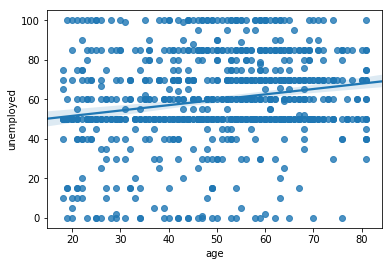

In [240]:
sns.regplot(x='age', y='unemployed', data=data3_m)

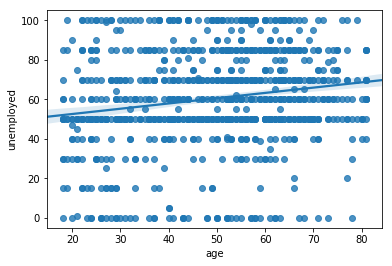

In [241]:
sns.regplot(x='age', y='unemployed', data=data3_f)

In [245]:
data3_bh = data3[data3['edu'] == 1]  # Below High school
data3_hs = data3[data3['edu'] == 2]  # High School
data3_su = data3[data3['edu'] == 3]  # Some University
data3_ua = data3[data3['edu'] == 4]  # Bachelor's degree or Above

In [253]:
print(f"Below High School: {pearsonr(data3_bh['age'], data3_bh['unemployed'])}")
print(f"High School: {pearsonr(data3_hs['age'], data3_hs['unemployed'])}")
print(f"Some University: {pearsonr(data3_su['age'], data3_su['unemployed'])}")
print(f"Bachelor\'s degree or Above: {pearsonr(data3_ua['age'], data3_ua['unemployed'])}")

Below High School: (0.18994951004489533, 0.022588115091518292)
High School: (0.15988042624805465, 0.0002132049049101922)
Some University: (0.1977920399380598, 2.3461739221470709e-06)
Bachelor's degree or Above: (0.18623746027481539, 3.2606620188688115e-06)


In [248]:
pearsonr(data3_hs['age'], data3_hs['unemployed'])

(0.15988042624805465, 0.0002132049049101922)

Text(0.5,1,'Less than high school education')

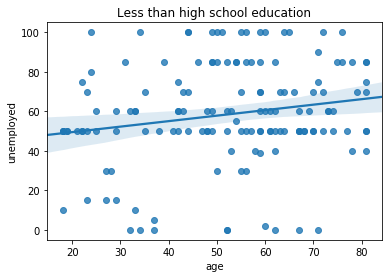

In [263]:
sns.regplot(x='age', y='unemployed', data=data3_bh)
plt.title('Less than high school education')

Text(0.5,1,'High school education')

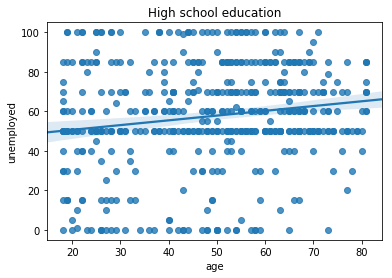

In [264]:
sns.regplot(x='age', y='unemployed', data=data3_hs)
plt.title('High school education')

Text(0.5,1,'Some university education')

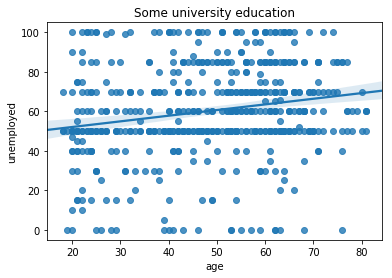

In [265]:
sns.regplot(x='age', y='unemployed', data=data3_su)
plt.title('Some university education')

Text(0.5,1,"Bachelor's degree or above education")

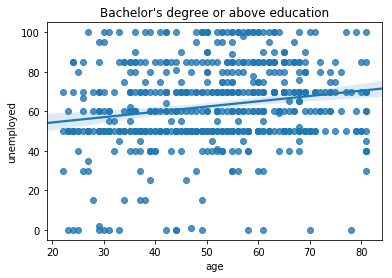

In [266]:
sns.regplot(x='age', y='unemployed', data=data3_ua)
plt.title('Bachelor\'s degree or above education')